# This colab notebook corresponds to Day 1 Training Agenda
## Part 1: Basic Python Programming (Numpy)
### Date: 29.11.2022
### Prepared by Geoinformatics Center, AIT


In [ ]:
# Basic Python Data Types

# Numeric
# int, float, string, bool, complex
x = 1
print(type(x))

int

In [ ]:
# iteration process
for i in range(9):
  print(i)

In [ ]:
# need to import the package
import numpy as np

# Nature of Numpy arrays
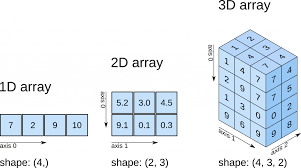

In [ ]:
# Numpy array is the basic element for any mathematical calculations
# Creating a new numpy array
x = np.array([1,2,3,4,5,6])

In [ ]:
# np.array can have multiple dimensions
x = np.array([[1,2,3], [1,2,3], [1,2,3]])
y = np.array([[4,5,6], [4,5,6], [4,5,6]])

In [ ]:
# check the dimension of your created array
print(x.shape)

In [ ]:
# you can apply mathematical operations to your arrays 
# Addition => +
# Subtraction => -
# Multiplication => *
# Division => /
# Power => np.square
# Square root
print(x + y)

In [ ]:
# Conditional formatting of numpy array
x[x == 1] = 0

In [ ]:
# Axis swapping
x = np.array([[[1,2,3],
               [4,5,6],
               [7,8,9]],
               [[10,11,12],
                [13,14,15],
                [16,17,18]],
               [[19,20,21],
                [22,23,24],
                [25,26,27]],
              [[12,53,76],
               [64,4,23],
               [12,0,0]]])

In [ ]:
print(x.shape)

(4, 3, 3)


In [ ]:
# adding dimension to existing numpy array
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
x.shape

(3, 3)

In [ ]:
x1 = np.newaxis()

In [ ]:
# changing the axis dimension
x2 = np.moveaxis(x, 0, 2)
print(x2)

[[[ 1 10 19 12]
  [ 2 11 20 53]
  [ 3 12 21 76]]

 [[ 4 13 22 64]
  [ 5 14 23  4]
  [ 6 15 24 23]]

 [[ 7 16 25 12]
  [ 8 17 26  0]
  [ 9 18 27  0]]]


In [ ]:
# removing axis
new_x = x[0,:,:]

## Part 2: Data Preparation (Climate, Terrain, Auxillary Data)


# The example dataset used in AgERA5 (Source:https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-agrometeorological-indicators?tab=overview). Registration required.

## 1. Extent clipping with shapefile
## 2. 
## 3. 


In [ ]:
# if there's python packages not installed, use this codeline
!pip install rioxarray geopandas list

In [ ]:
# I had problems with gdal. So, I'm using different package
import rioxarray
import xarray
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy as np
import os
import glob as glob

In [ ]:
# Connecting to my google drive
from google.colab import drive
drive.mount('drive/')

# 
import os
os.chdir('drive/My Drive/AgriERA5 Simulation/Climate Numpy')

In [ ]:
# uploading the shapefile of your desired area
shapefile = gpd.read_file(r'____')

In [ ]:
# Google drive path of 

### Example of 3D climatic data preparation

In [ ]:
# Example of batch preprocessing of a single 
for a in range(len(path)):
    os.chdir(path[a])
    lst_for_mean = []
    for i in range(len(months)):
        data = glob.glob('./'+months[i]+'/'+'*.nc')
        for k in range(len(data)):
            un_img = rioxarray.open_rasterio(data[k]) # opening ungeoregistered data
            re_img = un_img.rio.set_crs('epsg:4326') # setting spatial reference information
            clip_img = re_img.rio.clip(mask.geometry.apply(mapping), mask.crs) # using mask vector, we're clipping image
            num_img = clip_img.to_numpy() # transformation into numpy
            num_img = num_img[0,:,:] # removing extra dimension
            num_img[num_img==-9999] = np.nan # Converting no data -9999 as np.nan
            lst_for_mean.append(num_img)
        ave = np.mean(np.array(lst_for_mean), axis = 0)
        np.save(path[a]+datanames[a]+'_'+months[i]+'_clipped.npy', ave)    
    del(data, un_img, re_img, clip_img, num_img, ave)